In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('final_dataset.csv')

In [2]:
mapeo = {'Yes': 1, 'No': 0}
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
X = df[['Time_Segment', 'Holiday', 'Vacation_week', 'Weekend Return', 'Season']]
y=df['Exceeds Threshold']

# Convert categorical variables to numerical format using one-hot encoding
X = pd.get_dummies(X, columns=['Time_Segment', 'Season'])

Accuracy: 0.8127853881278538


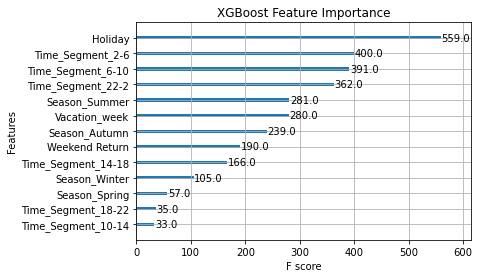

In [7]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder


split_index = int(len(df) * 0.85)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming your model is named 'model' and is already trained
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()
